<a href="https://colab.research.google.com/github/hrishita1708/Minor-Project-voice-data/blob/main/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import *


In [3]:
df=pd.read_csv('voice.csv')
df.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [6]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [7]:
#remove null values
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [9]:

unique_count=df.nunique(axis=0)
print(unique_count)

meanfreq    3166
sd          3166
median      3077
Q25         3103
Q75         3034
IQR         3073
skew        3166
kurt        3166
sp.ent      3166
sfm         3166
mode        2825
centroid    3166
meanfun     3166
minfun       913
maxfun       123
meandom     2999
mindom        77
maxdom      1054
dfrange     1091
modindx     3079
label          2
dtype: int64


In [13]:
d1=df['label'].value_counts()
d1

male      1584
female    1584
Name: label, dtype: int64

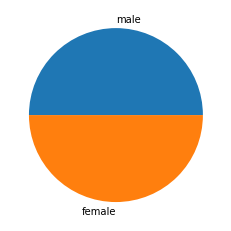

In [14]:
plt.pie(d1,labels=['male','female'])
plt.show()

In [17]:
y=df.iloc[:,-1]
y.head()

0    male
1    male
2    male
3    male
4    male
Name: label, dtype: object

In [20]:
X=df.drop(['label'],axis=1)
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [ ]:
#a. Decision Tree Classifier
#b. Random Forest Classifier
#c. KNN Classifier
#d. Logistic Regression
#e. SVM Classifier

In [27]:
model_1=DecisionTreeClassifier()

In [29]:
model_1.fit(X_train,y_train)


DecisionTreeClassifier()

In [34]:
model1_predict=model_1.predict(X_test)

In [35]:
confusion_matrix(model1_predict,y_test)

array([[298,  11],
       [ 10, 315]])

In [37]:
classification_report(model1_predict,y_test)

'              precision    recall  f1-score   support\n\n      female       0.97      0.96      0.97       309\n        male       0.97      0.97      0.97       325\n\n    accuracy                           0.97       634\n   macro avg       0.97      0.97      0.97       634\nweighted avg       0.97      0.97      0.97       634\n'

In [40]:
print(accuracy_score(model1_predict,y_test))

0.9668769716088328


In [ ]:
#b. RandomForestClassifier

In [45]:
model_2=RandomForestClassifier()
model_2.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
model2_predict=model_2.predict(X_test)

In [50]:
confusion_matrix(model2_predict,y_test)

array([[301,   5],
       [  7, 321]])

In [53]:
classification_report(model2_predict,y_test)

'              precision    recall  f1-score   support\n\n      female       0.98      0.98      0.98       306\n        male       0.98      0.98      0.98       328\n\n    accuracy                           0.98       634\n   macro avg       0.98      0.98      0.98       634\nweighted avg       0.98      0.98      0.98       634\n'

In [54]:
print(accuracy_score(model2_predict,y_test))

0.9810725552050473


In [ ]:
#c.KNN classifier 

In [61]:
model_3=KNeighborsClassifier(n_neighbors=2)
model_3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [62]:
model3_predict=model_3.predict(X_test)

In [63]:
confusion_matrix(model3_predict,y_test)

array([[250, 155],
       [ 58, 171]])

In [64]:
classification_report(model3_predict,y_test)

'              precision    recall  f1-score   support\n\n      female       0.81      0.62      0.70       405\n        male       0.52      0.75      0.62       229\n\n    accuracy                           0.66       634\n   macro avg       0.67      0.68      0.66       634\nweighted avg       0.71      0.66      0.67       634\n'

In [65]:
print(accuracy_score(model3_predict,y_test))

0.6640378548895899


In [ ]:
#LogisticRegression

In [68]:
model_4=LogisticRegression()
model_4.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [70]:
model4_predict=model_4.predict(X_test)

array([[252,  10],
       [ 56, 316]])

In [81]:
confusion_matrix(model4_predict,y_test)

array([[252,  10],
       [ 56, 316]])

In [72]:
classification_report(model4_predict,y_test)

'              precision    recall  f1-score   support\n\n      female       0.82      0.96      0.88       262\n        male       0.97      0.85      0.91       372\n\n    accuracy                           0.90       634\n   macro avg       0.89      0.91      0.89       634\nweighted avg       0.91      0.90      0.90       634\n'

In [74]:
print(accuracy_score(model4_predict,y_test))

0.8958990536277602


In [ ]:
#SSVM Classifier

In [75]:
model_5=SVC()
model_5.fit(X_train,y_train)

SVC()

In [76]:
model5_predict=model_5.predict(X_test)

In [79]:
classification_report(model5_predict,y_test)

'              precision    recall  f1-score   support\n\n      female       0.52      0.70      0.60       229\n        male       0.79      0.64      0.71       405\n\n    accuracy                           0.66       634\n   macro avg       0.66      0.67      0.65       634\nweighted avg       0.69      0.66      0.67       634\n'

In [80]:
print(accuracy_score(model5_predict,y_test))

0.6608832807570978


In [82]:
confusion_matrix(model5_predict,y_test)

array([[161,  68],
       [147, 258]])